<a href="https://colab.research.google.com/github/jquesada92/DP-900-Practice/blob/main/BOSTON_DATASET_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme('notebook')
plt.style.use("ggplot")

plt.rcParams["figure.titlesize"] = 20
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["figure.figsize"] = (8, 4)
! date

Wed Jun 22 21:37:15 UTC 2022


# Project Scenario: 
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.



Project Tasks:

> For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

- Task 1: Familiarize yourself with the dataset 

- Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

- Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

- Task 4: Generate basic statistics and visualizations for upper management. 

- Task 5: Use the appropriate tests to answer the questions provided.

- Task 6: Share your Jupyter Notebook.

_This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow._

## Task 1: Become familiar with the dataset

The following describes the dataset variables:

  - CRIM: per capita crime rate by town
  - ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS: proportion of non-retail business acres per town.
  - CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  - NOX: nitric oxides concentration (parts per 10 million)
  - RM: average number of rooms per dwelling
  - AGE: proportion of owner-occupied units built prior to 1940
  - DIS: weighted distances to five Boston employment centres
  - RAD: index of accessibility to radial highways
  - TAX: full-value property-tax rate per 10,000 dollars.
  - PTRATIO: pupil_teacher ratio by town
  - LSTAT: % lower status of the population
  - MEDV: Median value of owner-occupied homes in $1000's



## Task 3: In the Jupyter notebook you created in the previous task, add a code cell, and copy the contents below to load the Boston housing dataset in the notebook.

In [16]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [19]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Task 4: Generate Descriptive Statistics and Visualizations
Generate the following and explain your findings:

### For the "Median value of owner-occupied homes" provide a boxplot



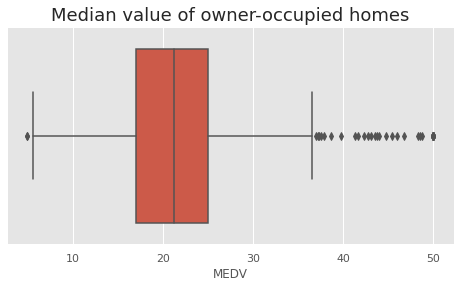

In [76]:
MEDV_boxplot = sns.boxplot(data = boston_df,x="MEDV")
MEDV_boxplot.set_title('Median value of owner-occupied homes')
plt.show()

In [46]:
boston_df.MEDV.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.0,17.025,21.2,25.0,50.0




*   Apperently MEDV over ~37 and below 6 are outliers
*   The mean MEDV values is 22.5




### Provide a  bar plot for the Charles river variable


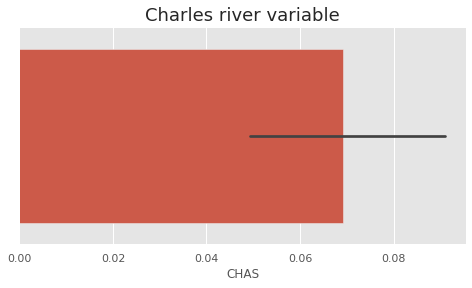

In [77]:
CHA_barplot = sns.barplot(data=boston_df,x='CHAS')
CHA_barplot.set_title('Charles river variable')
plt.show()

In [147]:
boston_df.CHAS.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
CHAS,506.0,0.06917,0.253994,0.0,0.0,0.0,0.0,1.0



### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [92]:
boston_df['age-binned'] = boston_df.AGE.apply(lambda x: '35 years and younger' if x <= 35 else '70 years and older' if x >=  70 else 'between 35 and 70 years' )
custom_sort_dict = {
                    "35 years and younger": 1,
                    "between 35 and 70 years": 2,
                    "70 years and older": 3,
                  
                }

In [115]:
# validating the categories by printing the min and max age.
boston_df.groupby('age-binned').AGE.describe().sort_index(
            key=lambda x: x.map(
                custom_sort_dict
            )
).style.set_caption("AGE By Age Groups")


,count,mean,std,min,25%,50%,75%,max
age-binned,,,,,,,,
35 years and younger,91.000000,22.835165,8.938274,2.900000,17.350000,22.900000,31.200000,34.900000
between 35 and 70 years,128.000000,52.478906,10.203270,35.700000,43.250000,52.850000,61.425000,69.700000
70 years and older,287.000000,90.256446,8.623400,70.200000,84.150000,92.600000,97.450000,100.000000


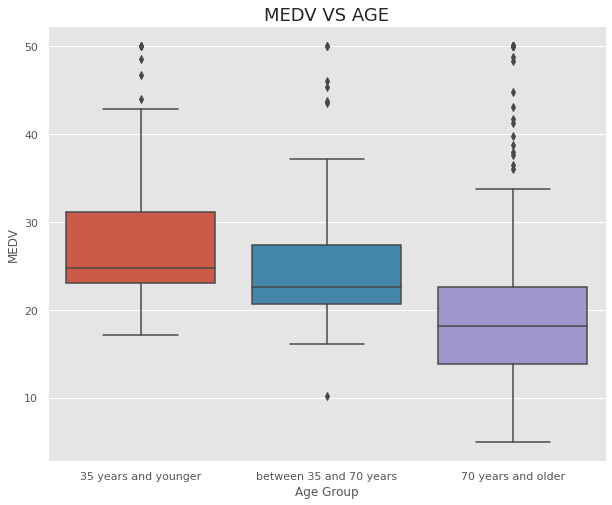

In [113]:
plt.figure(figsize=(10,8))
MEDV_AGE_boxplot = sns.boxplot(data=boston_df.sort_values(by='age-binned', key = lambda x: x.map(custom_sort_dict)),x="age-binned",y='MEDV')
plt.xlabel("Age Group")
plt.title("MEDV VS AGE")
plt.show()

In [116]:
# validating the categories by printing the min and max age.
boston_df.groupby('age-binned').MEDV.describe().sort_index(
            key=lambda x: x.map(
                custom_sort_dict
            )
).style.set_caption("AGE By Age Groups")


,count,mean,std,min,25%,50%,75%,max
age-binned,,,,,,,,
35 years and younger,91.000000,27.775824,7.638198,17.100000,23.050000,24.800000,31.150000,50.000000
between 35 and 70 years,128.000000,24.947656,6.969370,10.200000,20.675000,22.600000,27.425000,50.000000
70 years and older,287.000000,19.793380,9.515375,5.000000,13.800000,18.200000,22.550000,50.000000


### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

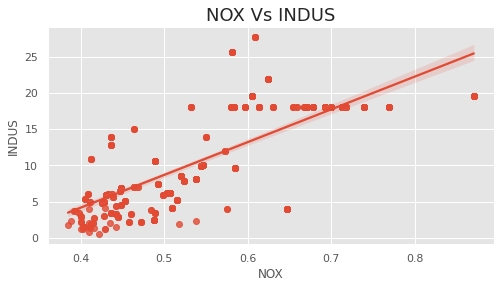

In [120]:
sns.regplot(data=boston_df,x="NOX",y="INDUS")
plt.title("NOX Vs INDUS")
plt.show()

In this plot we can see a positive correlation between INDUS and NOX.

### Create a histogram for the pupil to teacher ratio variable

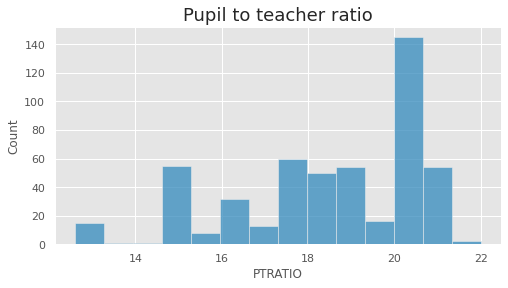

In [131]:
sns.histplot(data=boston_df,x="PTRATIO")
plt.title("Pupil to teacher ratio")
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.
For each of the following questions;
  - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
  - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
  - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
  - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [144]:
f_statistic, p_value =  stats.ttest_ind( boston_df['MEDV'], boston_df['CHAS'],equal_var=True )
print(f"F_Statistic: {f_statistic:.5f}\nP-Value: {p_value:.5f}")

F_Statistic: 54.92103
P-Value: 0.00000


**mean are not equals**

### H$\emptyset$: Is there not a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 (AGE)? (ANOVA)



In [135]:
class_1 = boston_df.loc[boston_df['age-binned'] =="35 years and younger"]['MEDV']
class_2 = boston_df.loc[boston_df['age-binned'] =="between 35 and 70 years"]['MEDV']
class_3 = boston_df.loc[boston_df['age-binned'] =="70 years and older"]['MEDV']
f_statistic, p_value = stats.f_oneway(class_1,class_2,class_3)
print(f"F_Statistic: {f_statistic:.5f}\nP-Value: {p_value:.5f}")

F_Statistic: 36.40765
P-Value: 0.00000


**The media Values for each proportion of owner-occupied units built before 1940 are different; the p-value from the ANOVA test is less than 0.05.
We reject the null hypothesis. The mean of each group are differentes**

 ### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [148]:
boston_df[['NOX','INDUS']].corr()

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


**There is a positive correlation of 0.76**

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

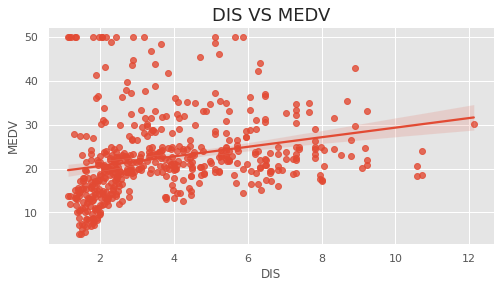

In [150]:
sns.regplot(data=boston_df,x='DIS',y='MEDV')
plt.title("DIS VS MEDV")
plt.show()

In [158]:
import statsmodels.api as sm
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
prediction = model.predict(X)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        23:13:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
print(f"Coef Person: {0.062**0.5}")

Coef Person: 0.24899799195977465


We have a low correlation between DIVS and MEDV with a coefficient of 1.0916.